Model trained and saved.
Irrigation Needed
Accuracy: 1.0

 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00       214

    accuracy                           1.00       325
   macro avg       1.00      1.00      1.00       325
weighted avg       1.00      1.00      1.00       325



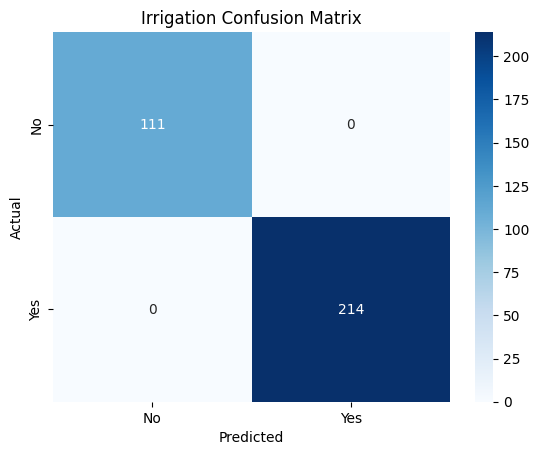

In [16]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import joblib

# Load your dataset
df = pd.read_csv("YieldResults.csv")

# Create 'irrigate' label if it doesn't exist
def label_irrigation(row):
    if row["soil_moisture"] < 30 and row["rainfall"] < 60:
        return 1
    return 0

df["irrigate"] = df.apply(label_irrigation, axis=1)

# Features and target
X = df[["temperature", "soil_moisture", "rainfall"]]
y = df["irrigate"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
clf = DecisionTreeClassifier(max_depth=5, criterion="gini")
clf.fit(X_train, y_train)

# Save model
joblib.dump(clf, "irrigation_model.pkl")
print("Model trained and saved.")  



import pandas as pd
import joblib

# Load model
model = joblib.load("irrigation_model.pkl")

# Correct sensor input (must match model training features)
sensor_data = {
    "temperature": 33,
    "soil_moisture": 25,
    "rainfall": 0.0  # Replace with real data if needed
}

# Create DataFrame
input_df = pd.DataFrame([sensor_data])

# (Optional) Safety check
expected_features = ["temperature", "soil_moisture", "rainfall"]
if list(input_df.columns) != expected_features:
    raise ValueError(f"Expected input columns: {expected_features}, but got: {list(input_df.columns)}")

# Predict
prediction = model.predict(input_df)[0]

# Output result
print("Irrigation Needed" if prediction == 1 else "No Irrigation Needed")


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred = clf.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification report
print("\n Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Irrigation Confusion Matrix")
plt.show() 

In [15]:
!pip install seaborn

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 3.4 MB/s  0:00:02m 3.4 MB/s eta 0:00:01
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 2.3 MB/s  0:00:02m 2.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s  0:00:006.0 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 5.3 MB/s  0:00:01a 0:00:01m eta 0:00:01
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]━━━ 7/8 [seaborn]ib]


In [17]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average CV accuracy:", scores.mean())


Cross-validation scores: [1.         0.99384615 1.         1.         1.        ]
Average CV accuracy: 0.9987692307692309
